Importing necessary libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

Import the dataset

In [25]:
# Path to your MMASH dataset folder
DATA_DIR = r'mmash\mmash\MMASH\DataPaper' 

Here we will visualize the activity the user performs in the entire duration.
There are 12 labelled activities that the user can be performing and we will visualize there duration using a Pie Chart.

In [26]:
activity_durations = {}

activity_labels = {
    1: "Sleeping",
    2: "Lying down",
    3: "Sitting",
    4: "Light movement",
    5: "Medium movement",
    6: "Heavy movement",
    7: "Eating",
    8: "Small screen usage",
    9: "Large screen usage",
    10: "Caffeinated drinks",
    11: "Smoking",
    12: "Alcohol consumption"
}

# Loop over all user folders
for user_id in range(1, 23):
    user_folder = os.path.join(DATA_DIR, f"user_{user_id}")
    activity_file = os.path.join(user_folder, "Activity.csv")
    
    if os.path.exists(activity_file):
        df_activity = pd.read_csv(activity_file)
        #df_activity = df_activity.apply(fix_time, axis=1)
        
        # Ensure 'Start' and 'End' are parsed as datetime
        # Adjust if your columns are named differently (e.g., 'start', 'end')
        #df_activity['Start'] = pd.to_datetime(df_activity['Start'])
        #df_activity['End']   = pd.to_datetime(df_activity['End'])
        
        df_activity['Start'] = df_activity['Start'].str.replace('24:00', '00:00')
        df_activity['End'] = df_activity['End'].str.replace('24:00', '00:00')
        df_activity['Start'] = pd.to_datetime(df_activity['Start'], errors='coerce')
        df_activity['End'] = pd.to_datetime(df_activity['End'], errors='coerce')

        # Fix cases where 'End' time was '24:00' by adding a day to the date
        df_activity.loc[df_activity['Start'] > df_activity['End'], 'End'] += pd.Timedelta(days=1)

        # Calculate duration (in minutes) for each row
        # Adjust the column name for the activity code if needed (e.g., 'category' vs 'Activity')
        for idx, row in df_activity.iterrows():
            cat_code = row['Activity']  # e.g. numeric category ID (1..12)
            
            if cat_code not in activity_labels:
                continue  # Skip unknown activities
            
            start_t  = row['Start']
            end_t    = row['End']
            
            if pd.notnull(start_t) and pd.notnull(end_t) and pd.notnull(cat_code):
                duration_min = (end_t - start_t).total_seconds() / 60.0
                
                # Accumulate into the dictionary
                # If cat_code doesn't exist yet, initialize at 0
                if cat_code not in activity_durations:
                    activity_durations[cat_code] = 0
                activity_durations[cat_code] += duration_min
    else:
        print(f"Warning: {activity_file} not found for user_{user_id}")

# Convert total durations into a pie chart
# First, map the numeric category codes to labels and handle missing categories
labels = []
durations = []
for cat_code, total_minutes in activity_durations.items():
    if cat_code in activity_labels:
        labels.append(activity_labels[cat_code])
    else:
        labels.append(f"Unknown_{cat_code}")
    durations.append(total_minutes)

# Calculate total duration across all activities
total_all_activities = sum(durations)



# Assume 'labels' and 'durations' are already computed
total_all_activities = sum(durations)
threshold = 5.0  # percentage threshold

# Compute percentage for each slice
percentages = [(d / total_all_activities) * 100 for d in durations]

# Create custom text: if a slice's percentage is >= threshold, show details; otherwise, show an empty string.
display_text = [
    f"{p:.1f}%<br>({d/60:.1f} hrs)" if p >= threshold else ""
    for p, d in zip(percentages, durations)
]

# Create the pie chart
fig = px.pie(
    names=labels,
    values=durations,
    title="Activity Durations of users"
)

# Update the trace: display our custom text inside the slices (only for major slices)
# The legend will still show all category names.
fig.update_traces(text=display_text, textinfo="text+percent", showlegend=True)

fig.show()

C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\320673809.py:34: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\320673809.py:35: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\320673809.py:34: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\320673809.py:35: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

Similarly, we will visualize the position of the user performs in the entire duration. (Sitting, Standing, and Lying) with the help of a Pie Chart.

In [33]:
import os
import pandas as pd
import plotly.express as px

# Adjust this path to your local dataset directory
#DATA_DIR = r"path\to\MMASH\DataPaper"

# Initialize accumulators for each posture (in seconds)
posture_totals = {
    "Standing": 0,
    "Sitting": 0,
    "Lying": 0
}

# Loop through each user folder
for user_id in range(1, 23):
    user_folder = os.path.join(DATA_DIR, f"user_{user_id}")
    actigraph_file = os.path.join(user_folder, "Actigraph.csv")
    
    if os.path.exists(actigraph_file):
        df_acti = pd.read_csv(actigraph_file)
        
        # Check that the expected columns exist:
        # If the columns are named differently, adjust accordingly.
        if set(["Inclinometer Standing", "Inclinometer Sitting", "Inclinometer Lying"]).issubset(df_acti.columns):
            # Sum up the counts per column (assuming each row corresponds to one second)
            posture_totals["Standing"] += df_acti["Inclinometer Standing"].sum()
            posture_totals["Sitting"] += df_acti["Inclinometer Sitting"].sum()
            posture_totals["Lying"]   += df_acti["Inclinometer Lying"].sum()
        else:
            print(f"Warning: Expected posture columns not found in {actigraph_file}")
    else:
        print(f"Warning: {actigraph_file} not found for user_{user_id}")

# Convert the posture_totals dictionary into a DataFrame for plotting
df_postures = pd.DataFrame({
    "Posture": list(posture_totals.keys()),
    "Seconds": list(posture_totals.values())
})

# Optionally, convert seconds to hours (if desired for the labels)
df_postures["Hours"] = df_postures["Seconds"] / 3600

# Create a pie chart with Plotly Express; here we'll show the total seconds
fig = px.pie(
    df_postures,
    names="Posture",
    values="Seconds",
    title="Proportion of Time Spent in Each Posture (Standing, Sitting, Lying)",
)

# If you want to show the duration in hours in the labels, we can customize the text:
custom_text = [
    f"{row['Posture']}: {row['Hours']:.1f} hrs" for _, row in df_postures.iterrows()
]
# Update the chart to display custom text inside the slices
fig.update_traces(text=custom_text, textinfo='label+percent')

fig.show()


Now we will visualize the Participant Activity Profile. This will contain the details performed by users and there heart rate during that time. 

In [34]:
# --- Helper Functions ---

# Define activity labels for readability
activity_labels = {
    1: "Sleeping",
    2: "Lying down",
    3: "Sitting",
    4: "Light movement",
    5: "Medium movement",
    6: "Heavy movement",
    7: "Eating",
    8: "Small screen usage",
    9: "Large screen usage",
    10: "Caffeinated drinks",
    11: "Smoking",
    12: "Alcohol consumption"
}

# --- Helper Functions ---

def parse_time(time_str):
    """
    Parse a time string in HH:MM:SS (or HH:MM) format and return a datetime.time object.
    """
    try:
        return datetime.strptime(time_str, "%H:%M:%S").time()
    except ValueError:
        return datetime.strptime(time_str, "%H:%M").time()

def time_to_minutes(t):
    """Convert a datetime.time object to minutes since midnight."""
    return t.hour * 60 + t.minute + t.second/60

def hr_from_ibi(ibi):
    """Compute heart rate (beats per minute) from inter-beat interval (seconds)."""
    return 60 / ibi if ibi > 0 else np.nan

def map_hr_to_color(hr, hr_min, hr_max):
    """
    Map a heart rate value to a color on a blue (low) to red (high) gradient.
    We'll use matplotlib's colormap.
    """
    import matplotlib.cm as cm
    # Normalize hr between 0 and 1
    norm_val = (hr - hr_min) / (hr_max - hr_min) if hr_max > hr_min else 0.5
    # Use a colormap (e.g., 'coolwarm' goes from blue to red)
    cmap = cm.get_cmap('coolwarm')
    return cmap(norm_val)

# --- Main Code ---

def build_graph(activity_df, actigraph_df):
    """
    Build the activity graph using:
    - Activity data to determine nodes and transitions.
    - Actigraph data to compute average heart rate during each activity segment.
    
    Returns a NetworkX DiGraph with node attributes:
      - 'total_time': total minutes spent in that activity.
      - 'avg_hr': weighted average heart rate (across segments in that activity).
      - 'color': color based on avg_hr.
    And edges with attribute:
      - 'transitions': count of transitions between activities.
    """
    # Ensure times in activity_df are parsed and converted to minutes.
    activity_df['Start_minutes'] = activity_df['Start'].apply(lambda x: time_to_minutes(x))
    activity_df['End_minutes']   = activity_df['End'].apply(lambda x: time_to_minutes(x))
    activity_df['Duration'] = activity_df['End_minutes'] - activity_df['Start_minutes']
    
    # For each activity segment, compute average HR from Actigraph data.
    avg_hr_segments = []
    for idx, row in activity_df.iterrows():
        day = row['Day']
        start = row['Start_minutes']
        end = row['End_minutes']
        # Filter Actigraph data for the same day
        acti_day = actigraph_df[actigraph_df['day'] == day].copy()
        # Parse the 'time' column in Actigraph data and convert to minutes
        acti_day['time_minutes'] = acti_day['time'].apply(lambda x: time_to_minutes(parse_time(x)))
        # Select data points within the activity segment time interval
        acti_segment = acti_day[(acti_day['time_minutes'] >= start) & (acti_day['time_minutes'] <= end)]
        if not acti_segment.empty:
            # Use the HR column (assumed to be in BPM) from Actigraph.csv
            avg_hr = acti_segment['HR'].mean()
        else:
            avg_hr = np.nan  # No HR data available in this period
        avg_hr_segments.append(avg_hr)
    activity_df['avg_hr'] = avg_hr_segments
    
    # Aggregate data per activity (node)
    node_data = {}
    for idx, row in activity_df.iterrows():
        cat = row['Activity']
        duration = row['Duration']
        hr = row['avg_hr']
        if cat not in node_data:
            node_data[cat] = {'total_time': 0, 'hr_sum': 0, 'duration_sum': 0}
        node_data[cat]['total_time'] += duration
        if not np.isnan(hr):
            node_data[cat]['hr_sum'] += hr * duration
            node_data[cat]['duration_sum'] += duration

    # Calculate weighted average HR per node
    avg_hr_per_node = {}
    for cat, data in node_data.items():
        if data['duration_sum'] > 0:
            avg_hr = data['hr_sum'] / data['duration_sum']
        else:
            avg_hr = np.nan
        avg_hr_per_node[cat] = avg_hr

    # Determine global min and max HR (ignoring nan) for coloring.
    valid_hr = [v for v in avg_hr_per_node.values() if not np.isnan(v)]
    hr_min = min(valid_hr) if valid_hr else 50
    hr_max = max(valid_hr) if valid_hr else 100

    # Build the graph
    G = nx.DiGraph()

    # Add nodes: each activity category becomes a node
    for cat, data in node_data.items():
        avg_hr = avg_hr_per_node.get(cat, np.nan)
        # Map average HR to a color
        node_color = map_hr_to_color(avg_hr, hr_min, hr_max) if not np.isnan(avg_hr) else (0.5, 0.5, 0.5, 1.0)
        # Ensure 'total_time' is present
        total_time = data.get('total_time', 0)
        G.add_node(cat,
                   label=activity_labels.get(cat, f"Activity {cat}"),
                   total_time=total_time,
                   avg_hr=avg_hr,
                   color=node_color)

    # Calculate transitions (edges) from sequential activities (within the same participant)
    transitions = {}
    # Sort activity_df by day and start time
    activity_df = activity_df.sort_values(by=['Day', 'Start_minutes'])
    prev_cat = None
    prev_day = None
    for idx, row in activity_df.iterrows():
        curr_cat = row['Activity']
        curr_day = row['Day']
        if prev_cat is not None and curr_day == prev_day:
            pair = (prev_cat, curr_cat)
            transitions[pair] = transitions.get(pair, 0) + 1
        prev_cat = curr_cat
        prev_day = curr_day

    # Add edges to the graph
    for (src, dst), count in transitions.items():
        G.add_edge(src, dst, transitions=count)

    return G

def draw_graph(G, node_scale=5, edge_scale=1):
    """
    Draw the graph with:
      - Node size proportional to total_time.
      - Node color from 'color' attribute.
      - Edge width proportional to transitions.
    """
    pos = nx.spring_layout(G, seed=42)
    node_sizes = [G.nodes[n]['total_time'] * node_scale for n in G.nodes()]
    node_scale_factor = 2     
    node_sizes = [size * node_scale_factor for size in node_sizes]
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]
    labels = {n: G.nodes[n]['label'] for n in G.nodes()}
    edge_widths = [G[u][v]['transitions'] * edge_scale for u, v in G.edges()]
    edge_width_factor = 3
    edge_widths = [width * edge_width_factor for width in edge_widths]

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, arrowstyle='->', arrowsize=12, edge_color='gray')
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')
    plt.title("Participant Activity Profile (Node color: Avg HR)")
    plt.axis('off')
    plt.show()


C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\255413050.py:19: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\255413050.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\atrey\AppData\Local\Temp\ipykernel_10316\2306184368.py:47: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



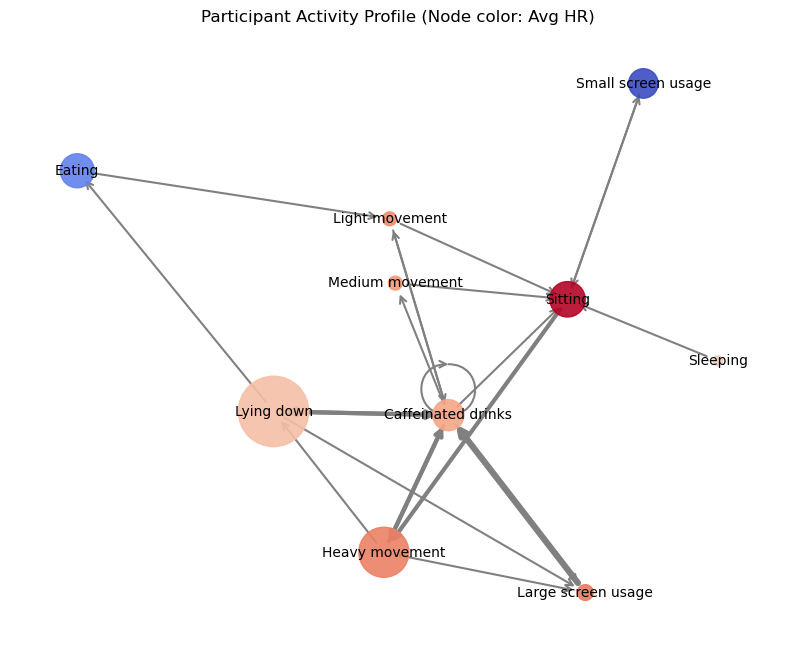

In [38]:
# Directory where the data is stored
DATA_DIR = r'mmash\mmash\MMASH\DataPaper'

# Select a user (or loop over all, for demonstration we're using one user)
user_id = 1
user_folder = os.path.join(DATA_DIR, f"user_{user_id}")

# Read Activity.csv from the selected user
activity_file = os.path.join(user_folder, "Activity.csv")
df_activity = pd.read_csv(activity_file)

# Read Actigraph.csv for HR data
actigraph_file = os.path.join(user_folder, "Actigraph.csv")
df_actigraph = pd.read_csv(actigraph_file)

# Pre-process Activity.csv times: handle "24:00" issues
df_activity['Start'] = df_activity['Start'].str.replace('24:00', '00:00')
df_activity['End'] = df_activity['End'].str.replace('24:00', '00:00')
df_activity['Start'] = pd.to_datetime(df_activity['Start'], errors='coerce')
df_activity['End'] = pd.to_datetime(df_activity['End'], errors='coerce')
df_activity.loc[df_activity['Start'] > df_activity['End'], 'End'] += pd.Timedelta(days=1)

# Remove rows where Activity is 0
df_activity = df_activity[df_activity['Activity'] != 0]

# Remove any unnamed columns from Actigraph.csv if present
df_actigraph = df_actigraph.loc[:, ~df_actigraph.columns.str.contains('^Unnamed')]

# Build and draw the graph using activity data and Actigraph HR data
G = build_graph(df_activity, df_actigraph)
draw_graph(G, node_scale=5, edge_scale=0.5)

Now we will visualize the temporal activity profile for each of the users in the two days of data collection.

Here, we will observe the heart rate of the user during each hour of the data collection for both the days.
First we will check for user 1.

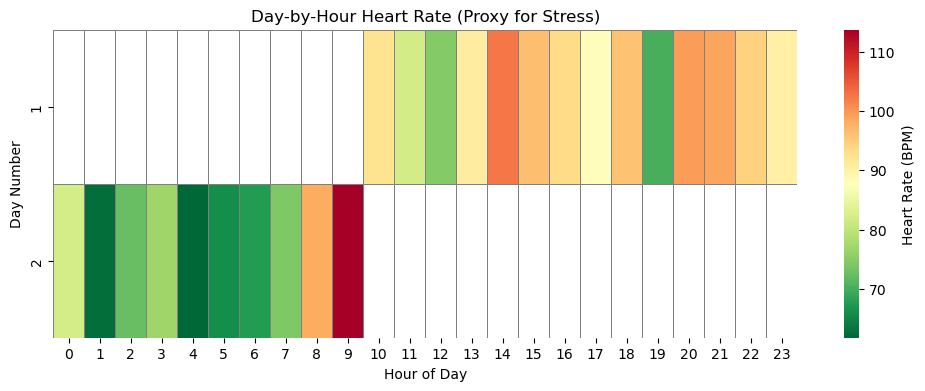

In [44]:
# Directory where the data is stored
DATA_DIR = r'mmash\mmash\MMASH\DataPaper'

# Select a user (or loop over all, for demonstration we're using one user)
user_id = 1
user_folder = os.path.join(DATA_DIR, f"user_{user_id}")

# Read Actigraph.csv for HR data
actigraph_file = os.path.join(user_folder, "Actigraph.csv")
df_actigraph = pd.read_csv(actigraph_file)

# 1) Parse timestamps and extract day/hour
#    Suppose we have columns: 'day', 'time', 'HR'
#    If 'time' is in "HH:MM:SS" format, parse it:
df_actigraph['datetime'] = df_actigraph['time'].apply(lambda t: datetime.strptime(t, "%H:%M:%S"))

# Extract hour from parsed time
df_actigraph['hour'] = df_actigraph['datetime'].dt.hour

# 2) Group by (day, hour) and compute average HR
grouped = df_actigraph.groupby(['day', 'hour'])['HR'].mean().reset_index()

# 3) Pivot for heatmap: rows=day, columns=hour, values=HR
pivot_df = grouped.pivot(index='day', columns='hour', values='HR')

# 4) Create a heatmap
plt.figure(figsize=(12, 4))
# Choose a colormap that transitions from green (low HR) to red (high HR)
# e.g. 'RdYlGn_r' is reversed so low is green, high is red
cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

ax = sns.heatmap(
    pivot_df,
    cmap=cmap,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Heart Rate (BPM)'}
)
ax.set_title("Day-by-Hour Heart Rate (Proxy for Stress)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Day Number")

plt.show()

Let us now check for all the users

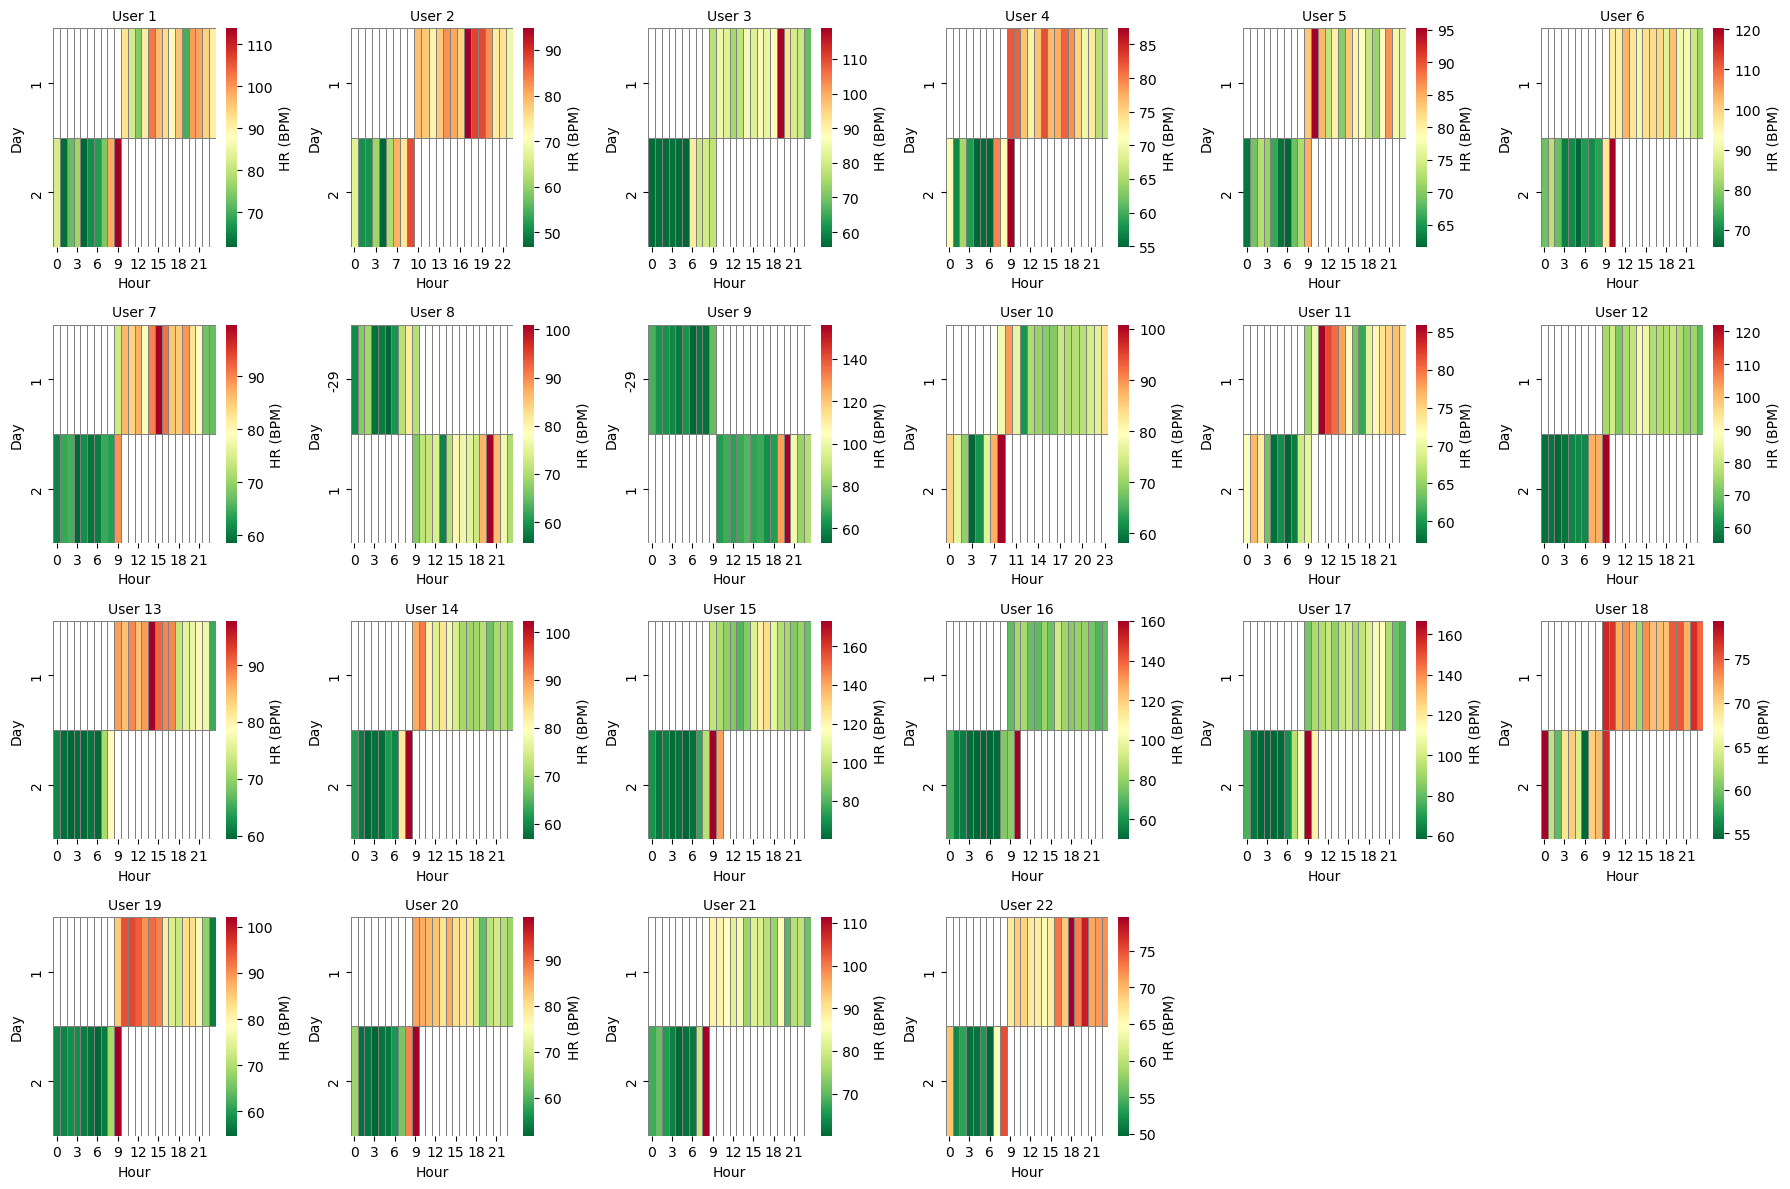

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

# Directory where the data is stored
DATA_DIR = r'mmash\mmash\MMASH\DataPaper'

# We'll use the 'RdYlGn_r' colormap: low HR (green) to high HR (red)
cmap = sns.color_palette("RdYlGn_r", as_cmap=True)

# Set number of users
n_users = 22

# Define grid dimensions: e.g., 4 rows x 6 columns (24 subplots)
ncols = 6
nrows = math.ceil(n_users / ncols)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop over each user and plot their heatmap
for i, user_id in enumerate(range(1, n_users + 1)):
    user_folder = os.path.join(DATA_DIR, f"user_{user_id}")
    actigraph_file = os.path.join(user_folder, "Actigraph.csv")
    
    # Read Actigraph.csv for HR data
    df_act = pd.read_csv(actigraph_file)
    
    # Parse time and extract hour
    df_act['datetime'] = df_act['time'].apply(lambda t: datetime.strptime(t, "%H:%M:%S"))
    df_act['hour'] = df_act['datetime'].dt.hour
    
    # Group by (day, hour) and compute average HR
    grouped = df_act.groupby(['day', 'hour'])['HR'].mean().reset_index()
    
    # Pivot for heatmap: rows=day, columns=hour, values=HR
    pivot_df = grouped.pivot(index='day', columns='hour', values='HR')
    
    # Plot heatmap in the corresponding subplot
    ax = axes[i]
    sns.heatmap(pivot_df, cmap=cmap, linewidths=0.5, linecolor='gray',
                cbar_kws={'label': 'HR (BPM)'}, ax=ax)
    ax.set_title(f"User {user_id}", fontsize=10)
    ax.set_xlabel("Hour")
    ax.set_ylabel("Day")

# Remove any unused subplots
for j in range(n_users, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Now we will explore the Contexual Activity Profile of a particular participant.

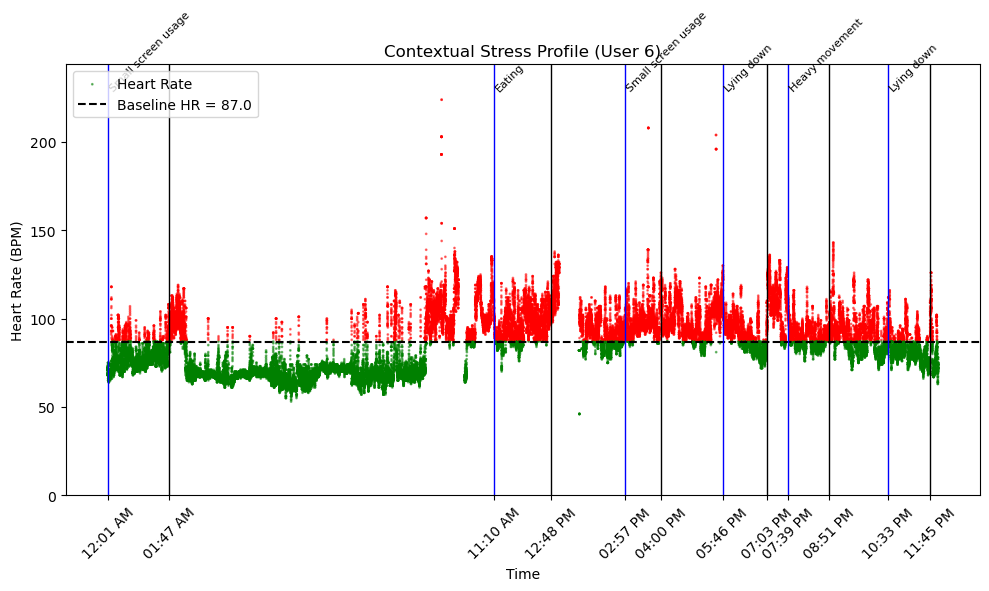

In [49]:
# Directory where the data is stored
DATA_DIR = r'mmash\mmash\MMASH\DataPaper'

# Select a user (or loop over all, for demonstration we're using one user)
user_id = 6
user_folder = os.path.join(DATA_DIR, f"user_{user_id}")

#df_act = pd.read_csv(actigraph_file)
# Read Actigraph.csv for HR data
actigraph_file = os.path.join(user_folder, "Actigraph.csv")
df_act = pd.read_csv(actigraph_file)

# Clean up any Unnamed columns
df_act = df_act.loc[:, ~df_act.columns.str.contains('^Unnamed')]

# Parse time column (HH:MM:SS) -> datetime.time
#df_act['time_obj'] = df_act['time'].apply(parse_time_hms)
df_act['time_obj'] = pd.to_datetime(df_act['time'], format='%H:%M:%S')
# Convert to minutes from midnight
#df_act['time_minutes'] = df_act['time_obj'].apply(time_to_minutes)

# We'll combine day + time_minutes into one timeline
# e.g., if day=1, we keep as is; if day=2, we add 24*60 = 1440 minutes offset
#df_act['day_offset'] = (df_act['day'] - 1) * 1440
#df_act['timeline'] = df_act['time_minutes'] + df_act['day_offset']

# 2) Read Activity data for context
activity_file = os.path.join(user_folder, "Activity.csv")
df_actv = pd.read_csv(activity_file)

# Convert "Start" / "End" to datetime, then to minutes
df_actv['Start'] = df_actv['Start'].str.replace('24:00','00:00')
df_actv['End']   = df_actv['End'].str.replace('24:00','00:00')
df_actv['Start'] = pd.to_datetime(df_actv['Start'], format='%H:%M')
df_actv['End'] = pd.to_datetime(df_actv['End'], format='%H:%M')

#df_actv['Start'] = pd.to_datetime(df_actv['Start'], errors='coerce')
#df_actv['End']   = pd.to_datetime(df_actv['End'], errors='coerce')
# Fix "start > end" scenario
df_actv.loc[df_actv['Start'] > df_actv['End'], 'End'] += pd.Timedelta(days=1)

# Convert start/end to minutes from midnight + offset
#df_actv['start_minutes'] = df_actv['Start'].dt.hour * 60 + df_actv['Start'].dt.minute + (df_actv['Day'] - 1)*1440
#df_actv['end_minutes']   = df_actv['End'].dt.hour * 60 + df_actv['End'].dt.minute   + (df_actv['Day'] - 1)*1440

# Filter out activity=0 if needed
df_actv = df_actv[df_actv['Activity'] != 0]
# Calculate duration in minutes
df_actv['duration'] = (df_actv['End'] - df_actv['Start']).dt.total_seconds() / 60

# Keep only activities longer than 60 minutes
df_actv = df_actv[df_actv['duration'] > 60]

# 3) Optionally read questionnaire for daily stress
questionnaire_file = os.path.join(user_folder, "questionnaire.csv")
if os.path.exists(questionnaire_file):
    df_q = pd.read_csv(questionnaire_file)
    daily_stress = df_q['Daily_stress'].iloc[0] if 'Daily_stress' in df_q.columns else np.nan
else:
    daily_stress = np.nan

# 4) Determine baseline stress (e.g., median HR) from Actigraph
# We'll treat HR as "stress" for demonstration
baseline_hr = df_act['HR'].median()

# 5) Plot
plt.figure(figsize=(10,6))

# Plot HR (stress) over timeline
# We can do a scatter or line. Let's do a scatter for more raw data look
#plt.scatter(df_act['timeline'], df_act['HR'], c='red', s=10, alpha=0.5, label='Heart Rate')

# Color mapping: Red for above baseline, Green for below baseline
colors = ['red' if hr > baseline_hr else 'green' for hr in df_act['HR']]

# Scatter plot with conditional colors
plt.scatter(df_act['time_obj'], df_act['HR'], c=colors, s=1, alpha=0.5, label="Heart Rate")

# Plot the baseline as a dashed line
plt.axhline(baseline_hr, color='black', linestyle='--', label=f"Baseline HR = {baseline_hr:.1f}")

# Add vertical lines for activity transitions
# We'll just plot lines where a new activity starts
for idx, row in df_actv.iterrows():
    # x is row['start_minutes'], y from 0 to e.g. max HR
    plt.axvline(x=row['Start'], color='b', linewidth=1, alpha=1)
    plt.axvline(x=row['End'], color='k', linewidth=1, alpha=1)

    
# Combine start and end times, and get unique sorted values
ticks = pd.concat([df_actv['Start'], df_actv['End']]).unique()
#ticks.sort()  # sort the tick values

# Set the ticks and labels
plt.xticks(ticks, ticks, rotation=45)

# (Optional) Label the activities near the top of the plot
max_hr = df_act['HR'].max()
for idx, row in df_actv.iterrows():
    activity = activity_labels.get(row['Activity'], 'Unknown')
    # Place label a bit above the max HR
    plt.text(row['Start'], max_hr+5, str(activity), rotation=45, fontsize=8)

# If you want to annotate daily_stress:
#if not np.isnan(daily_stress):
#    plt.text(df_act['timeline'].min(), baseline_hr - 10, f"Daily Stress: {daily_stress}", fontsize=9, color='blue')
# Set x-axis format to "date - HH:MM AM/PM"
#plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Tick every hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))  # Format as HH:MM AM/PM
# Format axis
plt.xlabel("Time")
plt.ylabel("Heart Rate (BPM)")
plt.title(f"Contextual Stress Profile (User {user_id})")
plt.legend()
plt.ylim(0, max_hr+20)
plt.tight_layout()
plt.show()

Now we will check one last approach to view Event based profile of participants

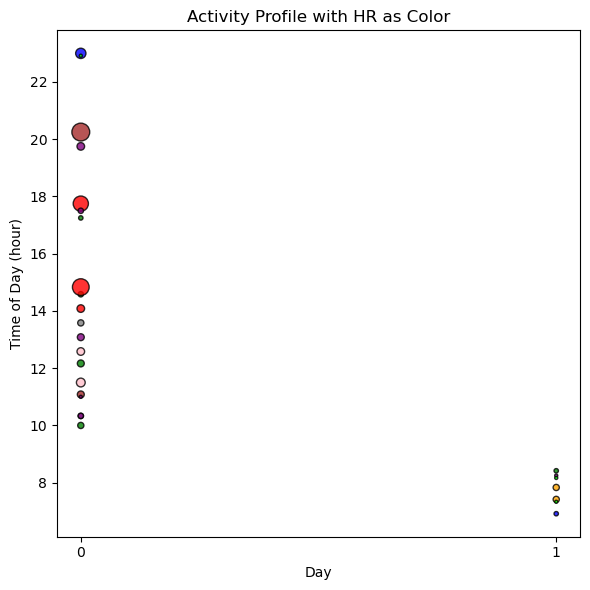

In [16]:
activity_colors = {
    1: 'blue',
    2: 'red',
    3: 'green',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'brown',
    8: 'pink',
    9: 'gray',
    10: 'cyan',
    11: 'magenta',
    12: 'lime'
}

# Directory where the data is stored
DATA_DIR = r'mmash\mmash\MMASH\DataPaper'

# Select a user (or loop over all, for demonstration we're using one user)
user_id = 12
user_folder = os.path.join(DATA_DIR, f"user_{user_id}")


activity_file = os.path.join(user_folder, "Activity.csv")
df_actv = pd.read_csv(activity_file)


# Convert "Start" / "End" to datetime, then to minutes
df_actv['Start'] = df_actv['Start'].str.replace('24:00','00:00')
df_actv['End']   = df_actv['End'].str.replace('24:00','00:00')
df_actv['Start'] = pd.to_datetime(df_actv['Start'], format='%H:%M')
df_actv['End'] = pd.to_datetime(df_actv['End'], format='%H:%M')
df_actv = df_actv[df_actv['Activity'] != 0]
df_actv.loc[df_actv['Start'] > df_actv['End'], 'End'] += pd.Timedelta(days=1)

# Calculate time of day in hours and duration (in minutes)
df_actv['TimeOfDay'] = df_actv['Start'].dt.hour + df_actv['Start'].dt.minute / 60.0
df_actv['Duration'] = (df_actv['End'] - df_actv['Start']).dt.total_seconds() / 60.0
df_actv['Act_color'] = df_actv['Activity'].map(activity_colors)


# Get sorted unique dates
unique_days = sorted(df_actv['Day'].unique())
day2num = {day: i for i, day in enumerate(unique_days)}

# Create a new column mapping each date to a numeric index
df_actv['DayIndex'] = df_actv['Day'].map(day2num)

fig, ax = plt.subplots(figsize=(6, 6))

# Plot all rows in a single scatter call
scatter = ax.scatter(
    df_actv['DayIndex'],       # x: numeric day index
    df_actv['TimeOfDay'],      # y: time in hours
    s=df_actv['Duration'],     # marker size
    c=df_actv['Act_color'],           # color scale = HR
    #cmap='viridis',
    alpha=0.8,
    edgecolors='black'
)

# Set x-ticks to these day indices
ax.set_xticks(list(day2num.values()))

# Label them with the actual date string
#ax.set_xticklabels([day.strftime('%m/%d') for day in unique_days])

# Add a colorbar for HR
#cbar = plt.colorbar(scatter, ax=ax)
#cbar.set_label('Heart Rate (BPM)')

ax.set_xlabel('Day')
ax.set_ylabel('Time of Day (hour)')
ax.set_title('Activity Profile with HR as Color')
plt.tight_layout()
plt.show()


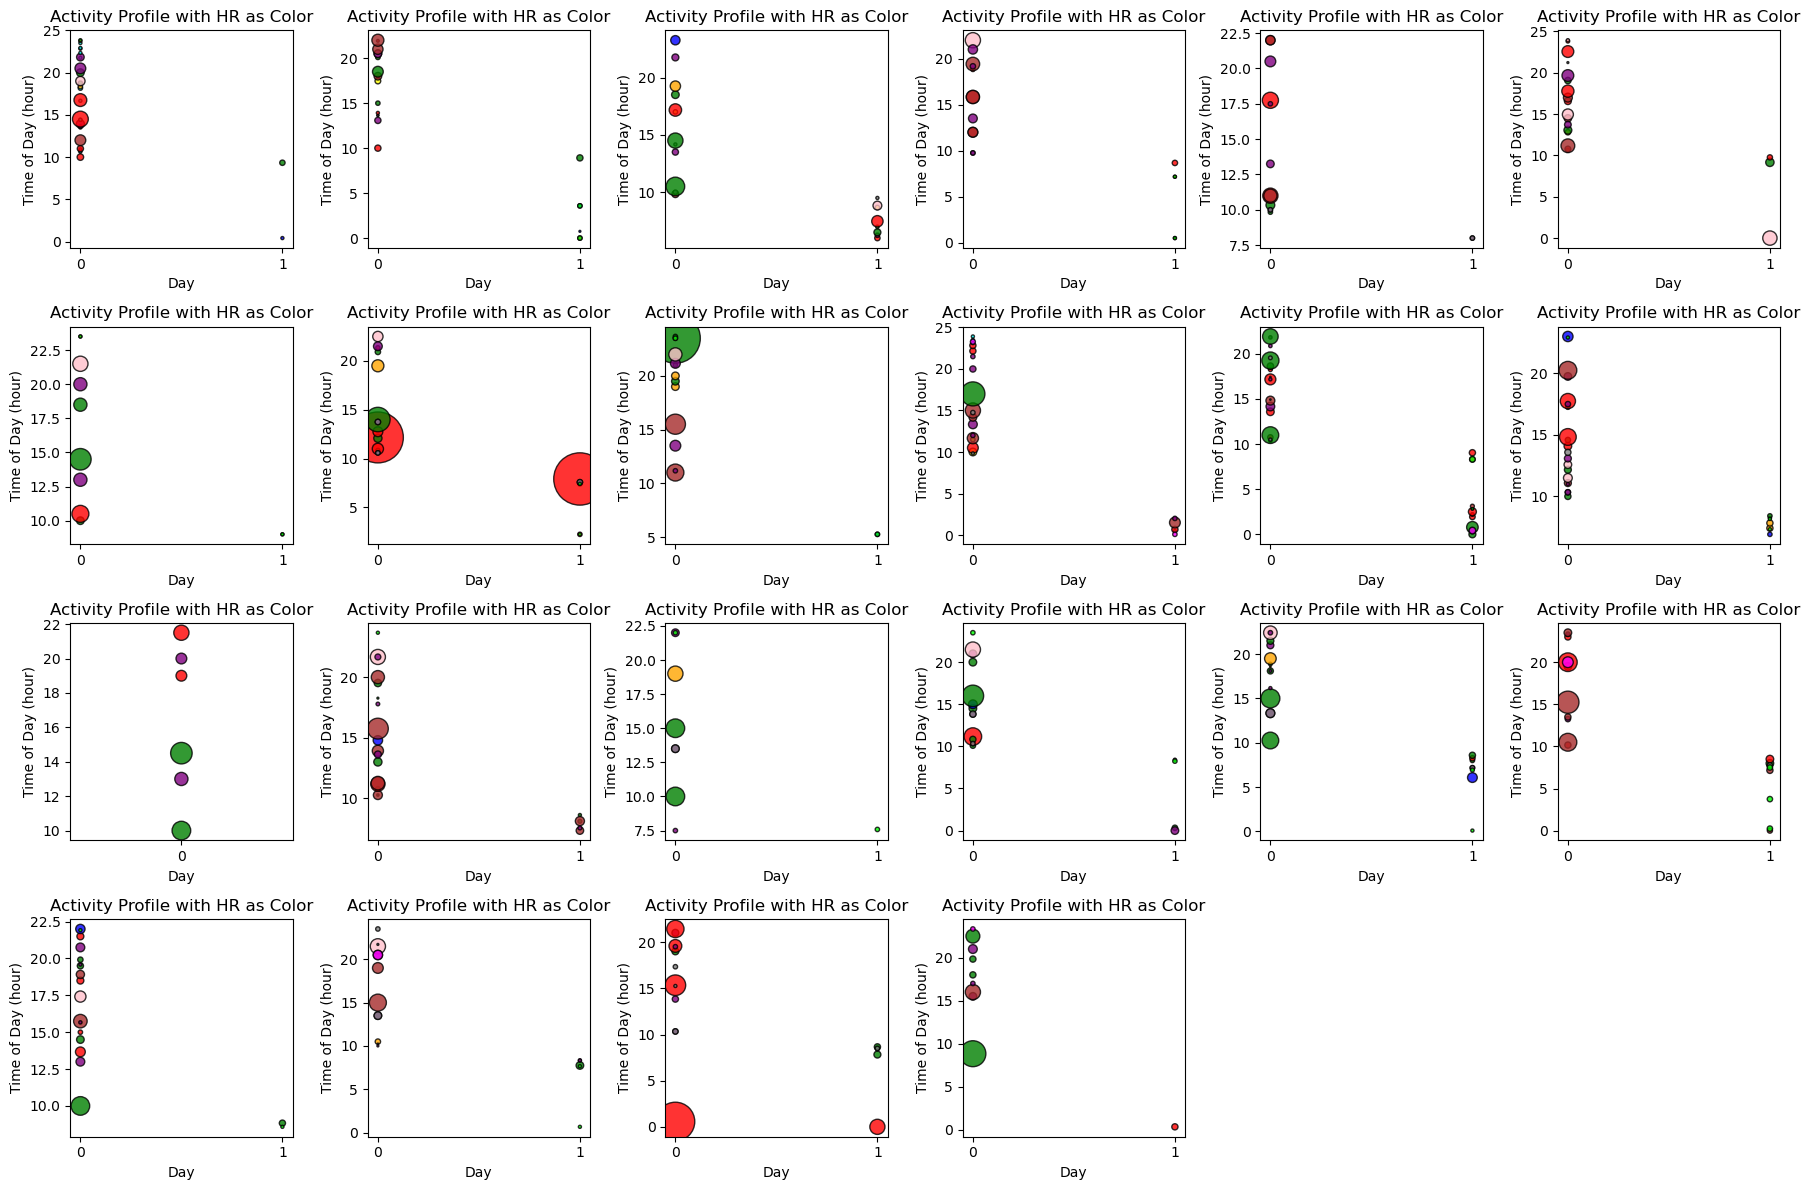

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

activity_colors = {
    1: 'blue',
    2: 'red',
    3: 'green',
    4: 'yellow',
    5: 'orange',
    6: 'purple',
    7: 'brown',
    8: 'pink',
    9: 'gray',
    10: 'cyan',
    11: 'magenta',
    12: 'lime'
}

# Directory where the data is stored
DATA_DIR = r'mmash\mmash\MMASH\DataPaper'

# Set number of users
n_users = 22

# Define grid dimensions: e.g., 4 rows x 6 columns (24 subplots)
ncols = 6
nrows = math.ceil(n_users / ncols)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop over each user and plot their heatmap
for i, user_id in enumerate(range(1, n_users + 1)):
    user_folder = os.path.join(DATA_DIR, f"user_{user_id}")
    actigraph_file = os.path.join(user_folder, "Activity.csv")
    
    # Read Actigraph.csv for HR data
    df_actv = pd.read_csv(actigraph_file)
    
    # Convert "Start" / "End" to datetime, then to minutes
    df_actv['Start'] = df_actv['Start'].str.replace('24:00','00:00')
    df_actv['End']   = df_actv['End'].str.replace('24:00','00:00')
    df_actv['Start'] = pd.to_datetime(df_actv['Start'], format='%H:%M')
    df_actv['End'] = pd.to_datetime(df_actv['End'], format='%H:%M')
    df_actv = df_actv[df_actv['Activity'] != 0]
    df_actv.loc[df_actv['Start'] > df_actv['End'], 'End'] += pd.Timedelta(days=1)

    # Calculate time of day in hours and duration (in minutes)
    df_actv['TimeOfDay'] = df_actv['Start'].dt.hour + df_actv['Start'].dt.minute / 60.0
    df_actv['Duration'] = (df_actv['End'] - df_actv['Start']).dt.total_seconds() / 60.0
    df_actv['Act_color'] = df_actv['Activity'].map(activity_colors)


    # Get sorted unique dates
    unique_days = sorted(df_actv['Day'].unique())
    day2num = {day: i for i, day in enumerate(unique_days)}

    # Create a new column mapping each date to a numeric index
    df_actv['DayIndex'] = df_actv['Day'].map(day2num)

    
    # Plot heatmap in the corresponding subplot
    ax = axes[i]
    #sns.heatmap(pivot_df, cmap=cmap, linewidths=0.5, linecolor='gray',
    #            cbar_kws={'label': 'HR (BPM)'}, ax=ax)
    #ax.set_title(f"User {user_id}", fontsize=10)
    #ax.set_xlabel("Hour")
    #ax.set_ylabel("Day")



    # Plot all rows in a single scatter call
    ax.scatter(
        df_actv['DayIndex'],       # x: numeric day index
        df_actv['TimeOfDay'],      # y: time in hours
        s=df_actv['Duration'],     # marker size
        c=df_actv['Act_color'],           # color scale = HR
        #cmap='viridis',
        alpha=0.8,
        edgecolors='black'
    )

    # Set x-ticks to these day indices
    ax.set_xticks(list(day2num.values()))

    # Label them with the actual date string
    #ax.set_xticklabels([day.strftime('%m/%d') for day in unique_days])

    # Add a colorbar for HR
    #cbar = plt.colorbar(scatter, ax=ax)
    #cbar.set_label('Heart Rate (BPM)')

    ax.set_xlabel('Day')
    ax.set_ylabel('Time of Day (hour)')
    ax.set_title('Activity Profile with HR as Color')


# Remove any unused subplots
for j in range(n_users, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

